# Выбор локации для скважины

Для добывающей компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.

Цель: определить наиболее прибыльный регион

Задачи:
- Построить модель и оценить объём запасов;
- Рассмотреть каждый регион и выбрать месторождения с самым высокими оценками значений;
- Оценить прибыльность каждого региона;
- Определить риски каждого региона техникой *Bootstrap.*;
- Выбрать наиболее прибыльный регион техникой *Bootstrap.*.




## Загрузка и подготовка данных

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tqdm.notebook import tqdm

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

import scipy.stats as st

from sklearn.linear_model import LinearRegression#линейная регрессия

import warnings
warnings.filterwarnings("ignore")

BUDGET = 10000000 #Бюджет на разработку скважин в регионе, тыс.руб
INCOME_PER_BARREL = 450#Доход с каждой единицы продукта, тыс.руб 
PROBABILITY_of_LOSSES = 2.5/100 # вероятность убытков 2.5%
COUNT_BOREHOLE = 200#выбираю 200 лучших для разработки скважин

In [40]:
try:
    df0 = pd.read_csv('C:/Users/Lubov/jupyter/ds/geo_data_0.csv' or '/datasets/geo_data_0.csv')
    
except:
    df0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')

try:
    df1 = pd.read_csv('C:/Users/Lubov/jupyter/ds/geo_data_1.csv' or '/datasets/geo_data_1.csv')
    
except:
    df1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    
try:
    df2 = pd.read_csv('C:/Users/Lubov/jupyter/ds/geo_data_2.csv' or '/datasets/geo_data_2.csv')
    
except:
    df2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

In [41]:
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [42]:
df1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [43]:
df2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Рассмотрим первый датасет

In [44]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [45]:
df0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [46]:
df0.duplicated().sum()

0

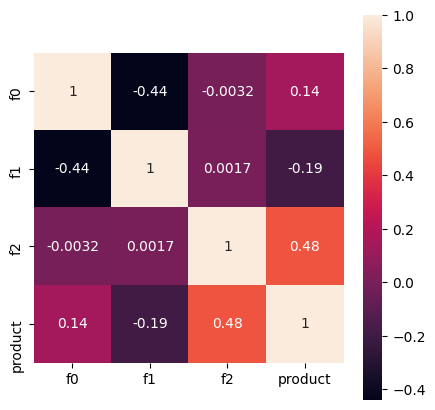

In [47]:
plt.figure(figsize=(5, 5))
sns.heatmap(df0.corr(), annot=True, square=True);

Рассмотрим второй датасет

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [49]:
df1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [50]:
df1.duplicated().sum()

0

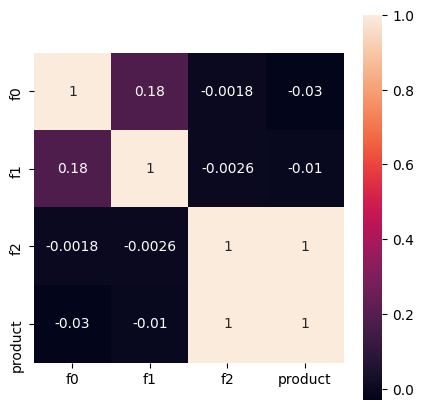

In [51]:
plt.figure(figsize=(5, 5))
sns.heatmap(df1.corr(), annot=True, square=True);

Рассмотрим третий датасет

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [53]:
df2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [54]:
df2.duplicated().sum()

0

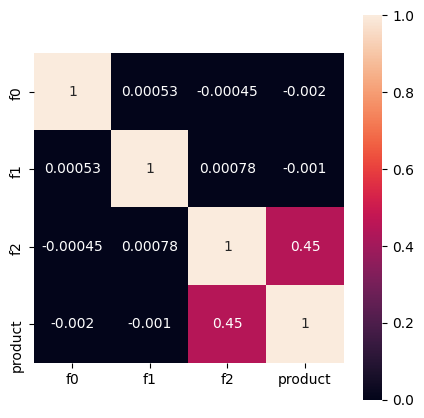

In [55]:
plt.figure(figsize=(5, 5))
sns.heatmap(df2.corr(), annot=True, square=True);

В каждом из регионов посмотрю на распределние запасов нефти

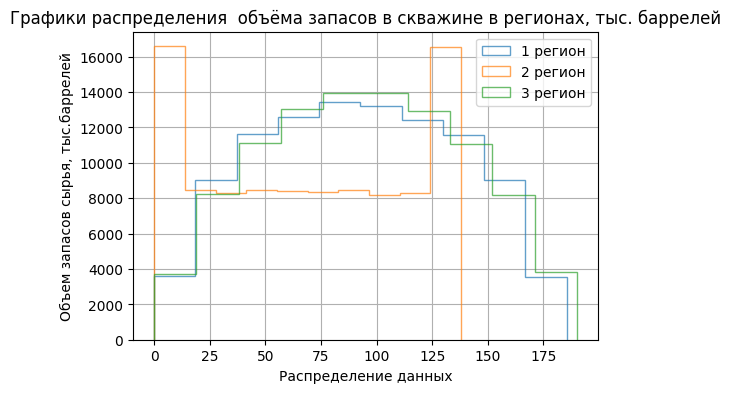

In [56]:

df0['product'].plot(kind='hist',figsize=(6,4),grid=True, legend=True, alpha=0.7, histtype='step', label='1 регион')
df1['product'].plot(kind='hist',figsize=(6,4),grid=True, legend=True, alpha=0.7,histtype='step', label='2 регион')
df2['product'].plot(kind='hist',figsize=(6,4),grid=True, legend=True, alpha=0.7,histtype='step', label='3 регион')


plt.xlabel('Распределение данных')
plt.ylabel('Объем запасов сырья, тыс.баррелей')
plt.title('Графики распределения  объёма запасов в скважине в регионах, тыс. баррелей')
plt.show()

### Вывод:

Предобработки данных не требуются (пропуски и дупликаты отсутствуют). Для второго региона стоит отметить сильную зависимость (коэф. корр.= 1) целевого показателя 'profit' от 'f2'. По распределнию запасов сырья в скважине можно сказать, что распределение во втором регионе отличается от распределений в 1 и 3 регионах.

In [57]:
df1['product'].unique()

array([  3.17910258,  26.95326103, 134.76630516, 137.94540774,
        84.03888568, 110.99214671,  53.90652206,   0.        ,
       107.81304413,  57.08562465,  30.13236361,  80.85978309])

In [58]:
df1['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

In [59]:
df1['id'].value_counts()

wt4Uk    2
bfPNe    2
LHZR0    2
5ltQ6    2
E01aS    1
        ..
xA3Ts    1
nNoo1    1
Ef0cS    1
5mc0Y    1
NbXZD    1
Name: id, Length: 99996, dtype: int64

In [60]:
df0['id'].value_counts()

bsk9y    2
AGS9W    2
QcMuo    2
TtcGQ    2
bxg6G    2
        ..
3q9mH    1
XZyWG    1
bTne4    1
UYsU9    1
uOTFR    1
Name: id, Length: 99990, dtype: int64

In [61]:
df2['id'].value_counts()

xCHr8    2
VF7Jo    2
KUPhW    2
Vcm5J    2
nU7DM    1
        ..
vLdee    1
SN3dY    1
Uk4jx    1
JRILt    1
ES7PV    1
Name: id, Length: 99996, dtype: int64

## Обучение и проверка модели

In [62]:
# Для каждого региона объявлю две переменные features — признаки и target — целевой признак. Удаляю столбец "id", 
#так как по условиям задачи нам нет необходимости определять конкретные id скважин

features_0 = df0.drop(['product',"id"], axis = 1)
target_0 = df0['product']

features_1 = df1.drop(['product',"id"], axis = 1)
target_1 = df1['product']

features_2 = df2.drop(['product',"id"], axis = 1)
target_2 = df2['product']

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size = 0.25, random_state = 12345)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size = 0.25, random_state = 12345)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size = 0.25, random_state = 12345)

In [63]:
print(target_train_0.shape, target_valid_0.shape)#посмотрю размеры выборок
print(target_train_1.shape, target_valid_1.shape)
print(target_train_2.shape, target_valid_2.shape)

(75000,) (25000,)
(75000,) (25000,)
(75000,) (25000,)


Обучу модель (по условиям задачи логистическая регрессия) и сделаю предсказания на валидационной выборке, оценю качество модели техникой RMSE и посчитаю средний запас сырья для каждого региона по предсказаниям. Для дальнейшего использования подготовлю массивы с выборками по регионам.

In [64]:
mass_train_features = [features_train_0, features_train_1, features_train_2]#тренировочный массив
mass_train_targets = [target_train_0, target_train_1, target_train_2]

mass_valid_features = [features_valid_0, features_valid_1, features_valid_2]#валидационный массив
mass_valid_targets = [target_valid_0, target_valid_1, target_valid_2]

mass_predictions = []#создаем массив с предсказаниями

for i in range(len(mass_train_features)):
    model = LinearRegression()
    model.fit(mass_train_features[i], mass_train_targets[i])
    predictions = model.predict(mass_valid_features[i])
    mass_predictions.append(pd.Series(predictions))
    print('RMSE для региона №' + str(i + 1), mean_squared_error(mass_valid_targets[i], predictions) ** 0.5)
    print('Cредний запас сырья для региона по предсказаниям', predictions.mean().round(2), '\n')

RMSE для региона №1 37.5794217150813
Cредний запас сырья для региона по предсказаниям 92.59 

RMSE для региона №2 0.8930992867756167
Cредний запас сырья для региона по предсказаниям 68.73 

RMSE для региона №3 40.02970873393434
Cредний запас сырья для региона по предсказаниям 94.97 



Посмотрю средние запасы сырья по регионам исходя из данных

In [65]:
product_mean_0 = df0['product'].mean()
product_mean_1 = df1['product'].mean()
product_mean_2 = df2['product'].mean()
print('Cредний запас сырья в 1 регионе: %.2f млн.баррелей'%product_mean_0)
print('Cредний запас сырья в 2 регионе: %.2f млн.баррелей'%product_mean_1)
print('Cредний запас сырья в 3 регионе: %.2f млн.баррелей'%product_mean_2)

Cредний запас сырья в 1 регионе: 92.50 млн.баррелей
Cредний запас сырья в 2 регионе: 68.83 млн.баррелей
Cредний запас сырья в 3 регионе: 95.00 млн.баррелей


### Вывод:

Самый большой средний запас сырья по предсказаниям - в 3 регионе, самый маленький - во втором. Средние данные по предсказаниям модели довольно близки к реальным средним данным.
RMSE определяет среднеквадратичную ошибку в предсказании модели, RMSE во 2 регионе сильно отличается от 3 и 1 региона, можно предположить, что модель обучилась на данных очень близких к данным 2 региона.  

## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. 

In [67]:
budg_1=(BUDGET/200)# тыс.руб
print('Бюджет на разработку одной скважины:', budg_1/1000,'млн.руб')

Бюджет на разработку одной скважины: 50.0 млн.руб


In [68]:
n = BUDGET/INCOME_PER_BARREL
print("Точка безубыточности: {0:.0f} тыс. баррелей".format(n))

Точка безубыточности: 22222 тыс. баррелей


In [69]:
print("Средний объем нефти в скважине для безубыточного функционирования:", n/count_borehole, 'тыс. баррелей')

Средний объем нефти в скважине для безубыточного функционирования: 111.11111111111111 тыс. баррелей


Регион 1. Средний запас сырья: 92.59 тыс. баррелей 

Регион 2. Средний запас сырья: 68.73 тыс. баррелей 

Регион 3. Средний запас сырья: 94.97 тыс. баррелей 

Объём сырья для безубыточной разработки новой скважины равен 111,1 тыс.баррелей, но в среднем каждый из регионов имеет меньшие значения. Так как средние данные меньше, то попробуем определить будет ли прибыль при разработке лучших 200 скважин.

In [70]:
a=(df0['product']>111.111).mean()*100

a#процент скважин, превышающих безубыточный объем для 1 региона

36.583

In [71]:
b=(df1['product']>111.111).mean()*100

b#процент скважин, превышающих безубыточный объем для 2 региона

16.537

In [72]:
c=(df2['product']>111.111).mean()*100

c#процент скважин, превышающих безубыточный объем для 3 региона

38.178

## Расчёт прибыли и рисков 

Выполним привязку индексов скважин к предсказаниям модели и отсорируем список по убыванию

In [73]:
probs_sorted_0 = pd.Series(mass_predictions[0], index=mass_valid_targets[0].index).sort_values(ascending=False)
top200 = probs_sorted_0[:200]
top200

23388    173.299686
7120     166.647830
9610     166.586642
19118    164.746455
3694     163.352610
            ...    
7009     135.148071
24625    135.110254
20224    135.029240
11167    135.026549
4825     135.021708
Length: 200, dtype: float64

In [74]:
top200_sum_0 = top200.sum()
print('Суммарный запас сырья в 200 лучших скважинах: %.2f тыс.баррелей'%top200_sum_0)

Суммарный запас сырья в 200 лучших скважинах: 28695.27 тыс.баррелей


In [75]:


profit_0=(top200_sum_0*income_per_barrel)-budget 
print('Прибыль для полученного объёма сырья составит %.2f тыс.рублей'%profit_0)

Прибыль для полученного объёма сырья составит 2912872.26 тыс.рублей


In [76]:
def profit_for_top200(predict,target,count):
    probs_sorted = pd.Series(predict, index=target.index).sort_values(ascending=False)
    selected_200_sum = probs_sorted[:count].sum()
    profit_top200=(selected_200_sum*income_per_barrel)-budget
    print('Запас сырья в 200 лучших скважинах: %.2f тыс.баррелей'%selected_200_sum)
    print('Прибыль %.2f млн.рублей'%(profit_top200/1000))

In [77]:
i=0
for i in range(3):
    print('Прибыль региона №' +  str(i + 1))
    profit_for_top200(mass_predictions[i], mass_valid_targets[i], 200)
    print('')

Прибыль региона №1
Запас сырья в 200 лучших скважинах: 28695.27 тыс.баррелей
Прибыль 2912.87 млн.рублей

Прибыль региона №2
Запас сырья в 200 лучших скважинах: 27625.77 тыс.баррелей
Прибыль 2431.60 млн.рублей

Прибыль региона №3
Запас сырья в 200 лучших скважинах: 27768.90 тыс.баррелей
Прибыль 2496.01 млн.рублей



Получилось, что все три региона потенциально прибыльные, далее определю наиболее выгодный регион и риски убытков.

In [78]:
def profit_for_top200_2(predict,target,count):
    probs_sorted = pd.Series(predict).sort_values(ascending=False)
    selected_200_sum = target[probs_sorted.index][:count]
    product = selected_200_sum.sum()
    revenue = product * income_per_barrel
    return revenue - budget

In [83]:
def bootstap_1000(target,predict):
    values = []
    count=0
    state = np.random.RandomState(12345)
    
    for i in tqdm(range(1000)):
        target_subsample = target.reset_index(drop=True).sample(n=500,replace=True, random_state=state)
        probs_subsample = predict[target_subsample.index]
        values.append(profit_for_top200_2(probs_subsample,target_subsample, 200))  
    for i in values:
        if i < 0:
            count +=1
            
    values = pd.Series(values)
    
    mean = values.mean()
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
    
    plt.title('Распределение прибыли')
    values.plot(kind="hist", grid=True, figsize=(5,3))
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()
    
    low_95 = values.quantile(0.025)
    high_95 = values.quantile(0.975)
    
    print("Средняя прибыль: {:.2f} млн.руб".format(mean/1000))
    print('С вероятностью 95% прибыль в данном регионе будет составлять от: {:.2f} млн.руб до: {:.2f} млн.руб'.format((low_95/1000),(high_95/1000)))
    print("95%-ый доверительный интервал: от {:.2f} млн.руб до {:.2f} млн.руб". format((confidence_interval[0]/1000),(confidence_interval[1]/1000)))
    print ('Процент вероятности убытка {:.1%}'.format(count/1000))

Регион №1


  0%|          | 0/1000 [00:00<?, ?it/s]

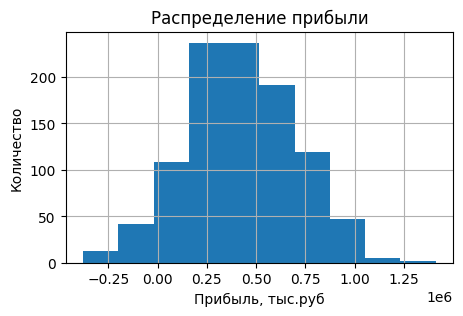

Средняя прибыль: 425.94 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -102.09 млн.руб до: 947.98 млн.руб
95%-ый доверительный интервал: от 408.73 млн.руб до 443.14 млн.руб
Процент вероятности убытка 6.0%

Регион №2


  0%|          | 0/1000 [00:00<?, ?it/s]

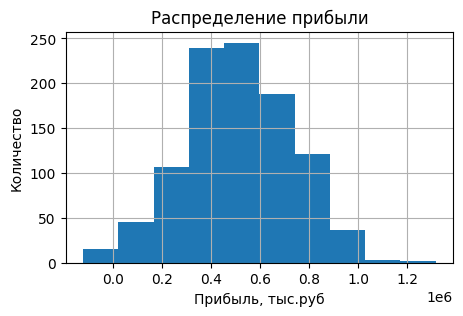

Средняя прибыль: 515.22 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 68.87 млн.руб до: 931.55 млн.руб
95%-ый доверительный интервал: от 501.62 млн.руб до 528.82 млн.руб
Процент вероятности убытка 1.0%

Регион №3


  0%|          | 0/1000 [00:00<?, ?it/s]

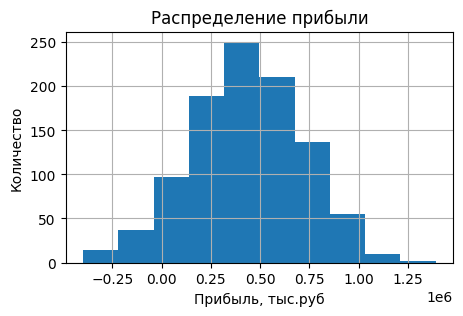

Средняя прибыль: 435.01 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -128.88 млн.руб до: 969.71 млн.руб
95%-ый доверительный интервал: от 417.45 млн.руб до 452.56 млн.руб
Процент вероятности убытка 6.4%



In [84]:
i=0
for i in range(3):
    print('Регион №' +  str(i + 1))
    bootstap_1000(mass_valid_targets[i], mass_predictions[i])
    print('')

### Вывод

Регион №1 
Средняя прибыль: 425.94 млн.руб
Процент вероятности убытка 6.0%

Регион №2 
Средняя прибыль: 515.22 млн.руб
Процент вероятности убытка 1%

Регион №3
Средняя прибыль: 435.01 млн.руб
Процент вероятности убытка 6.4%

Все три региона потенциально прибыльные, самый прибыльный регион №2, также регион №2 имеет самый низкий процент вероятности убытка - 1%, что удовлетворят порог условий задачи - 2,5%.

Выше мы видим, что средний запас сырья во 2 регионе был наименьший - 68.73 тыс. баррелей, но по итогам исследования, по 200 лучшим скважинам 2 регион лидирует по прибыльности.

## Вывод

В результате исследования было рассмотрено 3 региона, в каждом регионе - 10000 скважин. При подсчете средних запасов по скважинам, я пришла к выводу, что запасов недостаточно для безубыточного функционирования (даже для окупаемости), далее проанализировала лучшие 200 скважин, обучила модель линейной регрессии и выполнила предсказания, а так же применили технологию bootstrap (с разделением на 1000 выборок).

По условиям задачи доверительный интервал получения прибыли определен в 95%, вероятность убытка - менее 2,5%, условиям удовлетворяет только 2 регион.

Несмотря на наименьший по сравнению с другими средний запас сырья во 2 регионе - 68.73 тыс. баррелей, по итогам исследования, по 200 лучшим скважинам 2 регион лидирует по прибыльности - средняя прибыль: 515.22 млн.руб, процент вероятности убытка 1%.